# K-MEANS CLUSTERING - AUTO INSURANCE DATASET

Lets load necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (20,15)

In [2]:
data = pd.read_csv('AutoInsurance (1).csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Lets explore our dataset

In [3]:
df = data.copy()

In [4]:
df.shape

(9134, 24)

<AxesSubplot:>

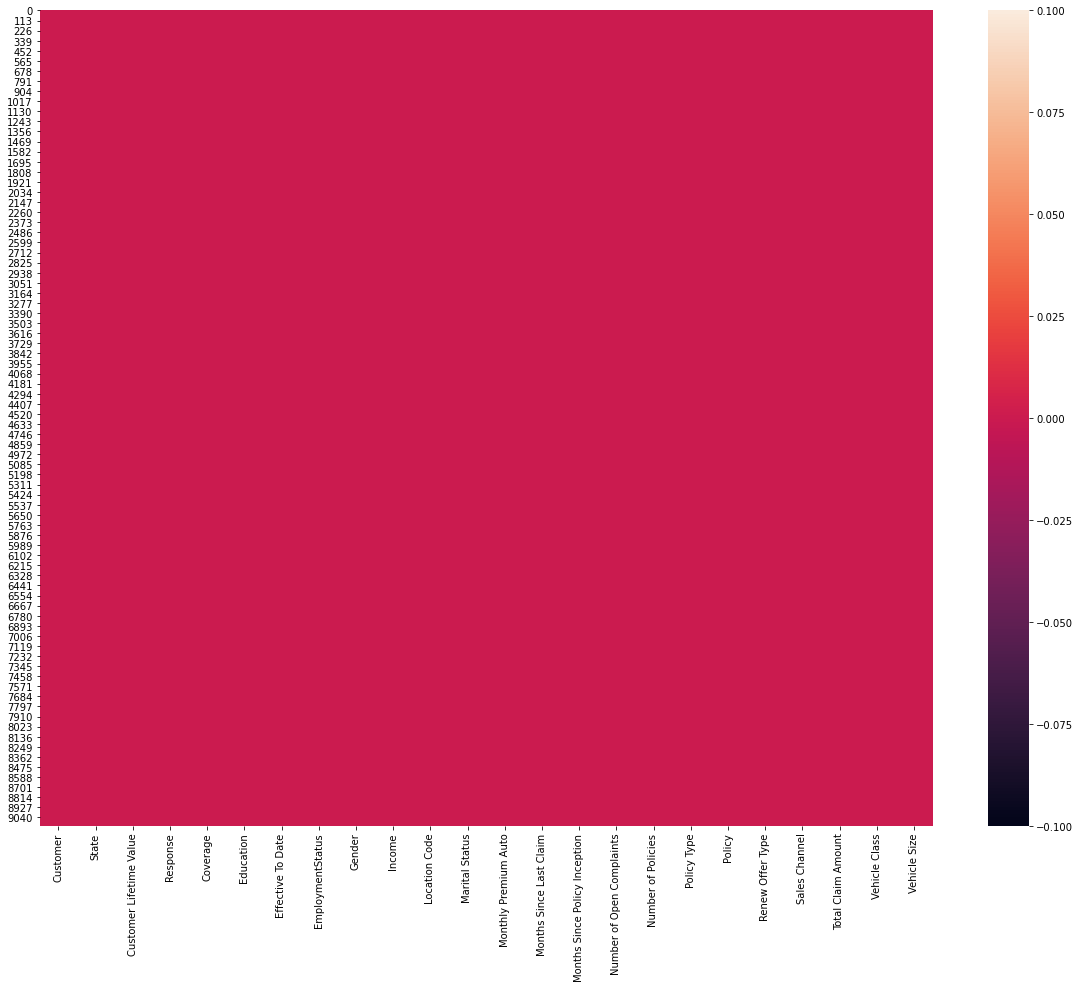

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Lets select all those columns which are float or int

In [9]:
data1 = df.select_dtypes(include=['float64', 'int64'])
data1.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [10]:
data1.shape

(9134, 8)

<AxesSubplot:>

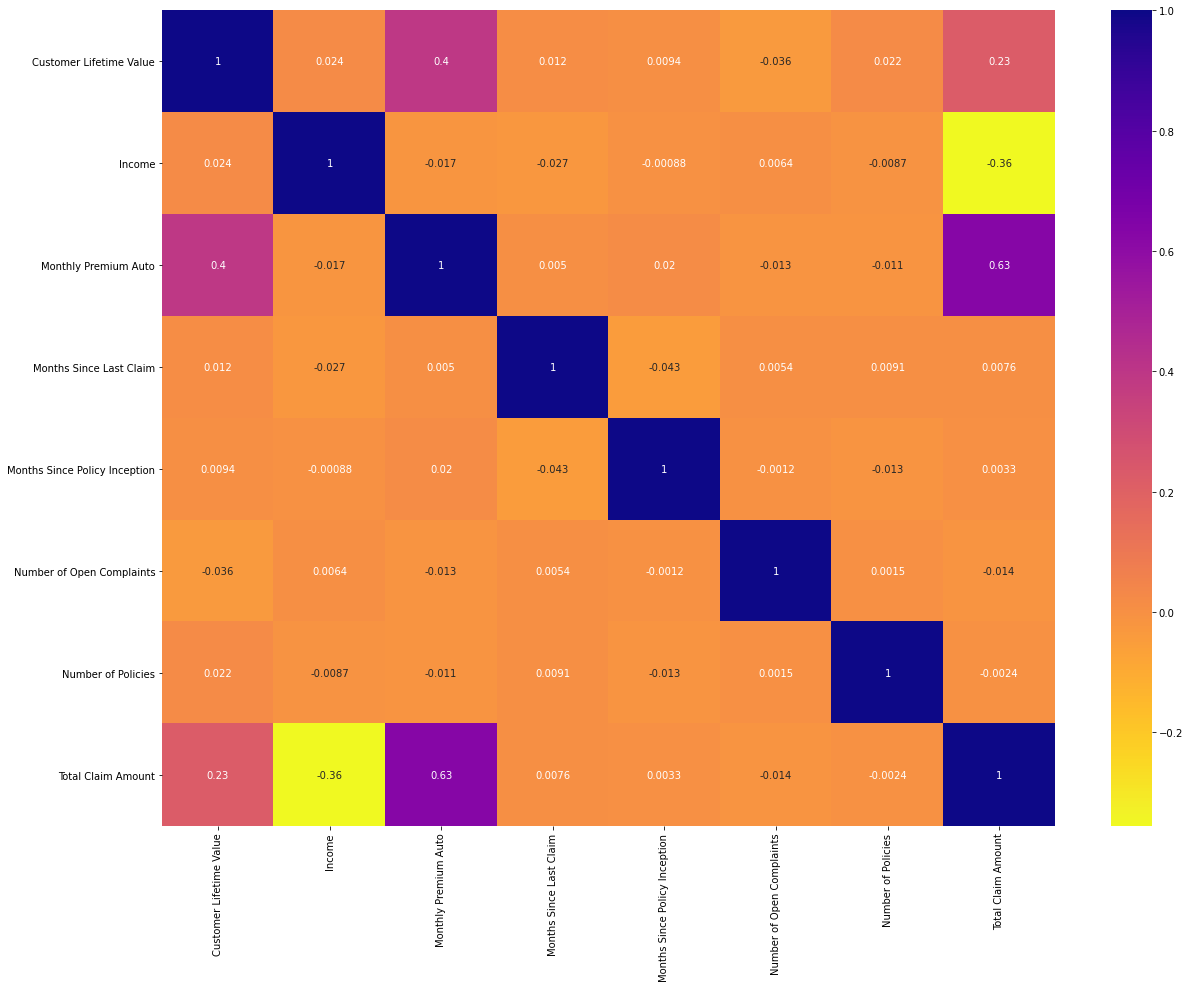

In [15]:
sns.heatmap(data1.corr(), annot = True, cmap='plasma_r')

<AxesSubplot:>

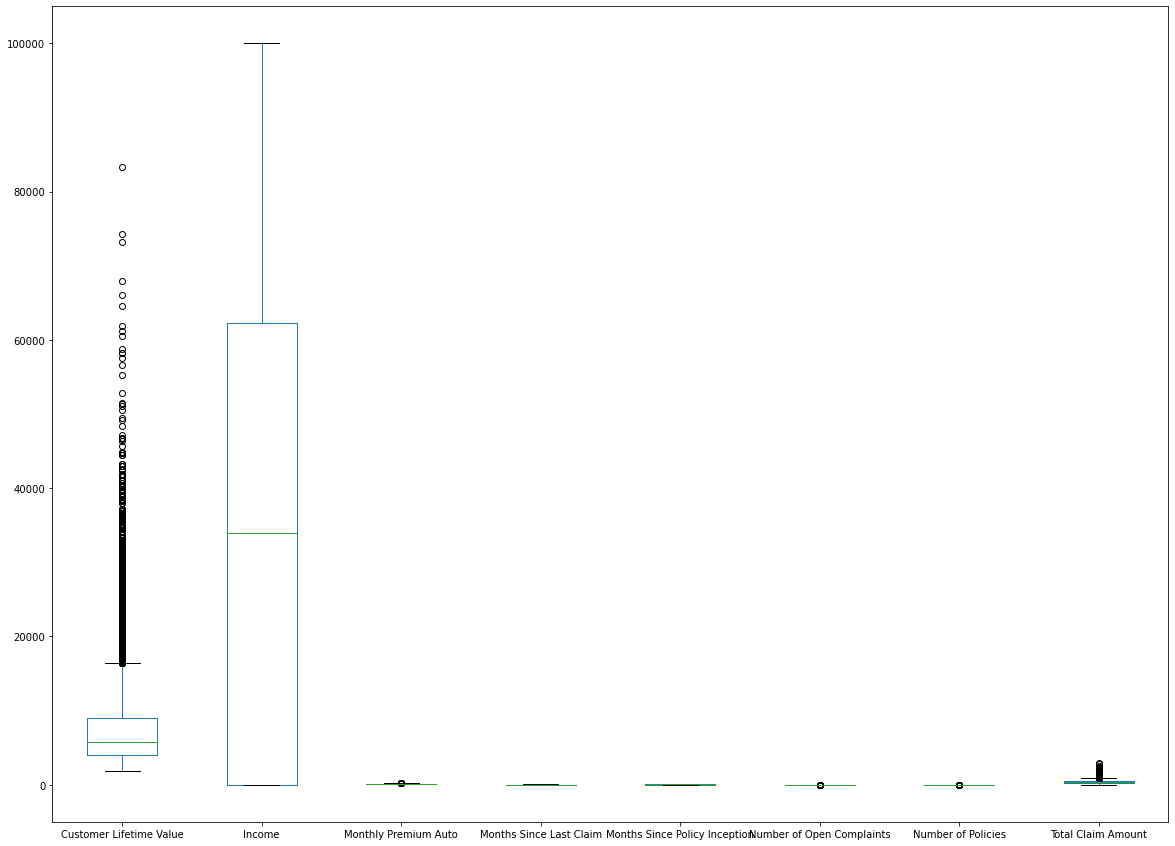

In [16]:
data1.plot(kind='box')

Lets visualize our df

<AxesSubplot:>

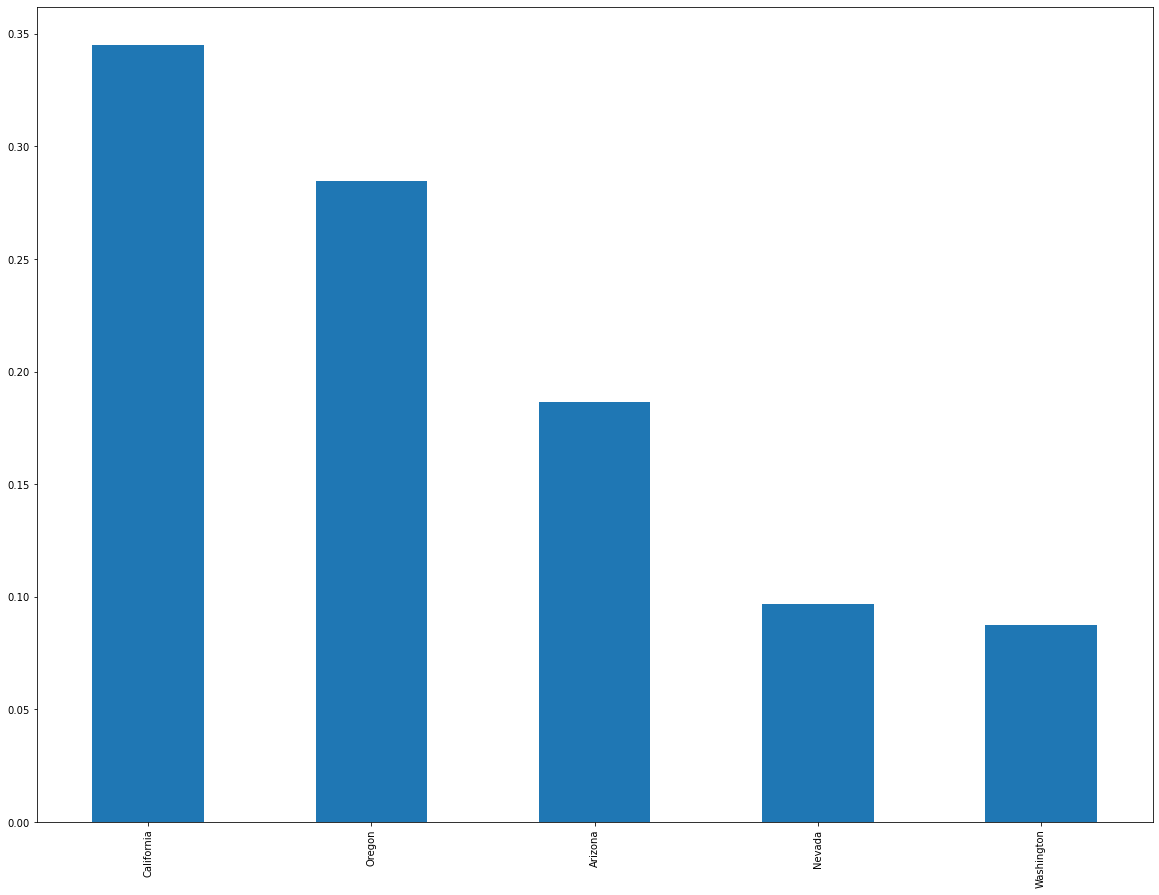

In [17]:
(df['State'].value_counts()/df.shape[0]).plot(kind='bar')

<AxesSubplot:>

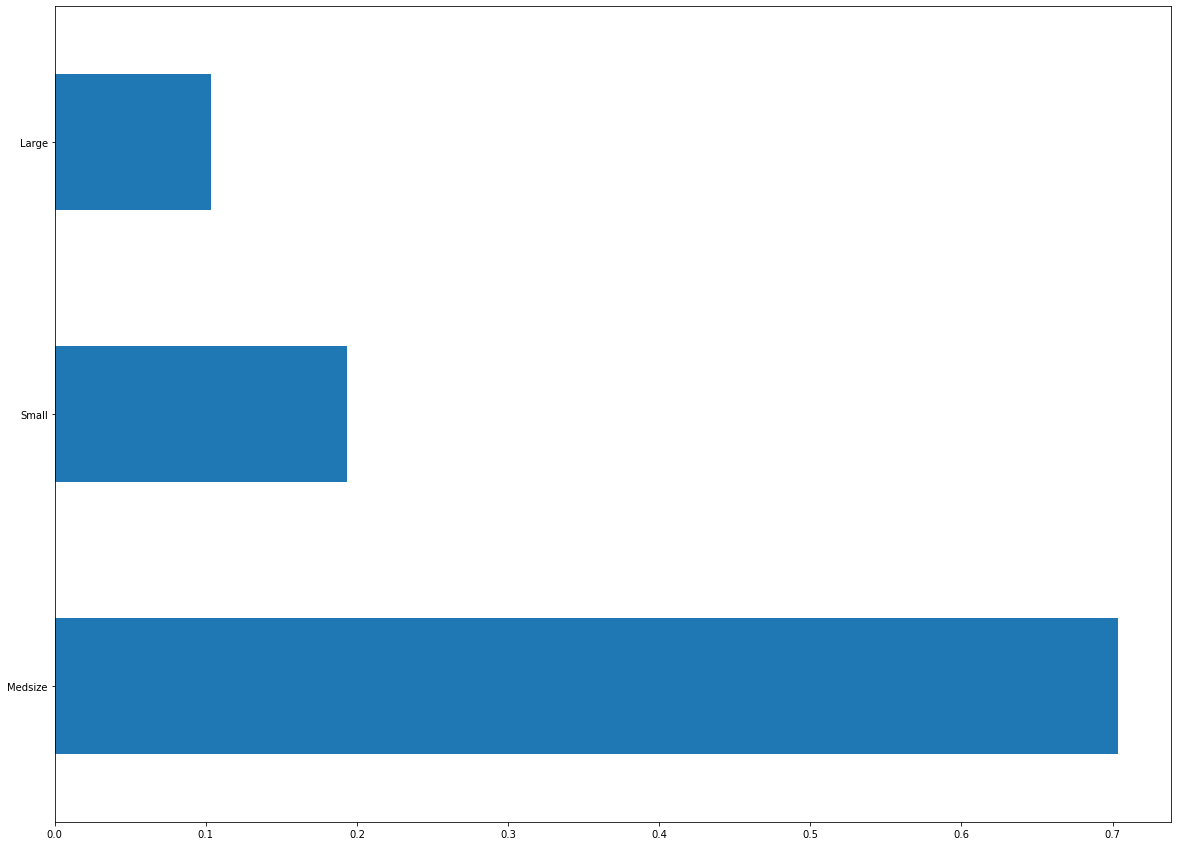

In [24]:
(df['Vehicle Size'].value_counts()/df.shape[0]).plot(kind='barh')

<AxesSubplot:ylabel='Gender'>

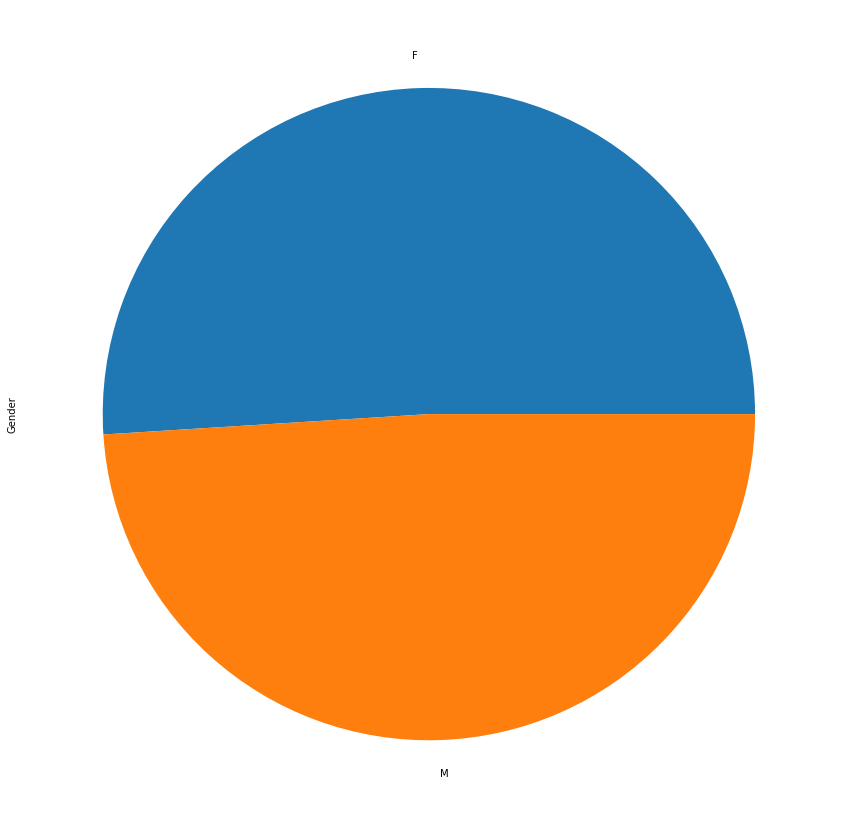

In [19]:
(df['Gender'].value_counts()/df.shape[0]).plot(kind='pie')

<AxesSubplot:>

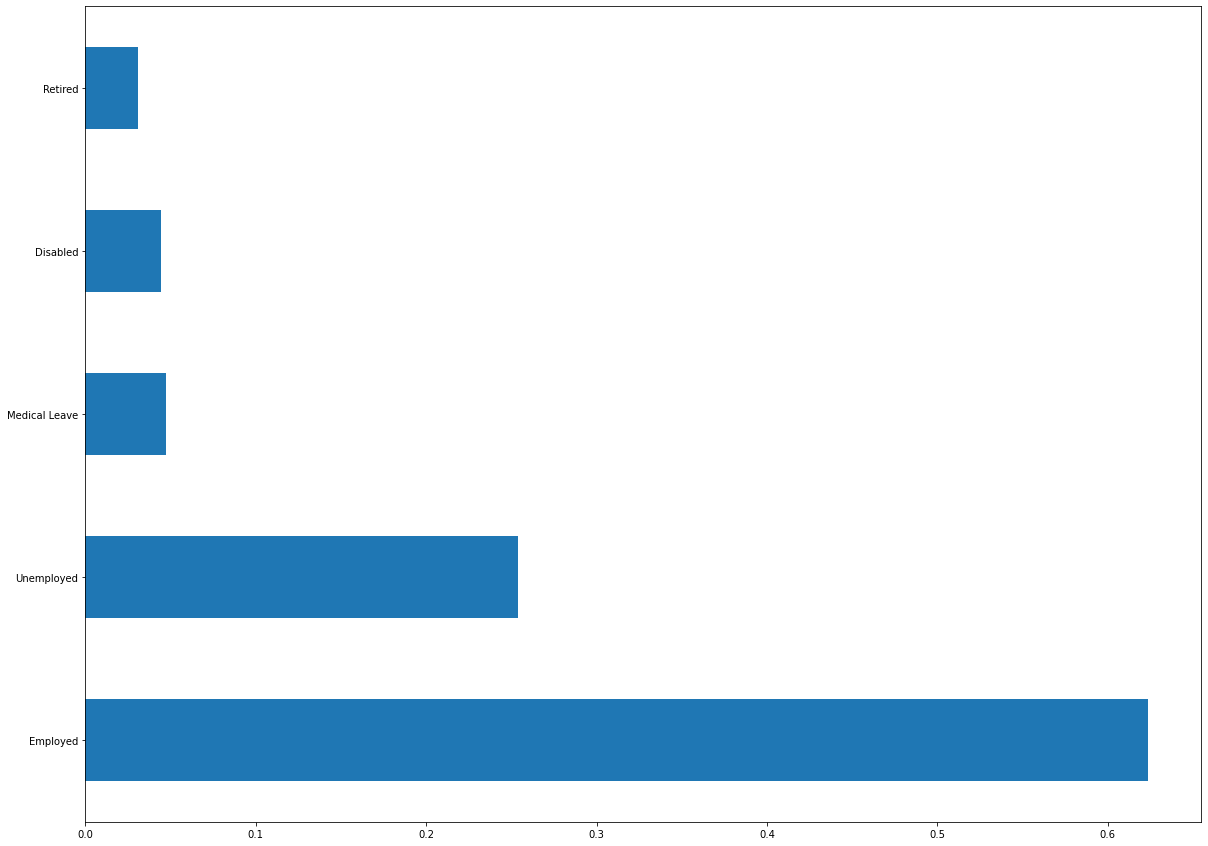

In [26]:
(df['EmploymentStatus'].value_counts()/df.shape[0]).plot(kind='barh')

We can drop Customer column from our dataframe

In [28]:
df = df.drop(columns=['Customer'])
df

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,10/2/2011,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,12/2/2011,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,6/2/2011,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,3/2/2011,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


Lets Create dummy variable for our object type data

In [34]:
data_object = df.select_dtypes('object')
data_object.columns

Index(['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [35]:
new_df = pd.get_dummies(df, columns=['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'])
new_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,0,1,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,0,1,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,0,...,0,0,0,0,0,0,1,0,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,1,...,0,0,0,0,1,0,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0,1,0,0,0,0,0,0,1,0


Lets check for Outliers

In [36]:
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)

IQR = Q3 - Q1

Outliers = (new_df < (Q1 - 1.5 * IQR)) | (new_df > (Q3 + 1.5 * IQR))
Outliers.sum()

Customer Lifetime Value           817
Income                              0
Monthly Premium Auto              430
Months Since Last Claim             0
Months Since Policy Inception       0
                                 ... 
Vehicle Class_Sports Car          484
Vehicle Class_Two-Door Car       1886
Vehicle Size_Large                946
Vehicle Size_Medsize                0
Vehicle Size_Small               1764
Length: 124, dtype: int64

In [37]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return(x)

norm = new_df.copy()

df_norm = norm_func(norm)
df_norm.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:ylabel='Density'>

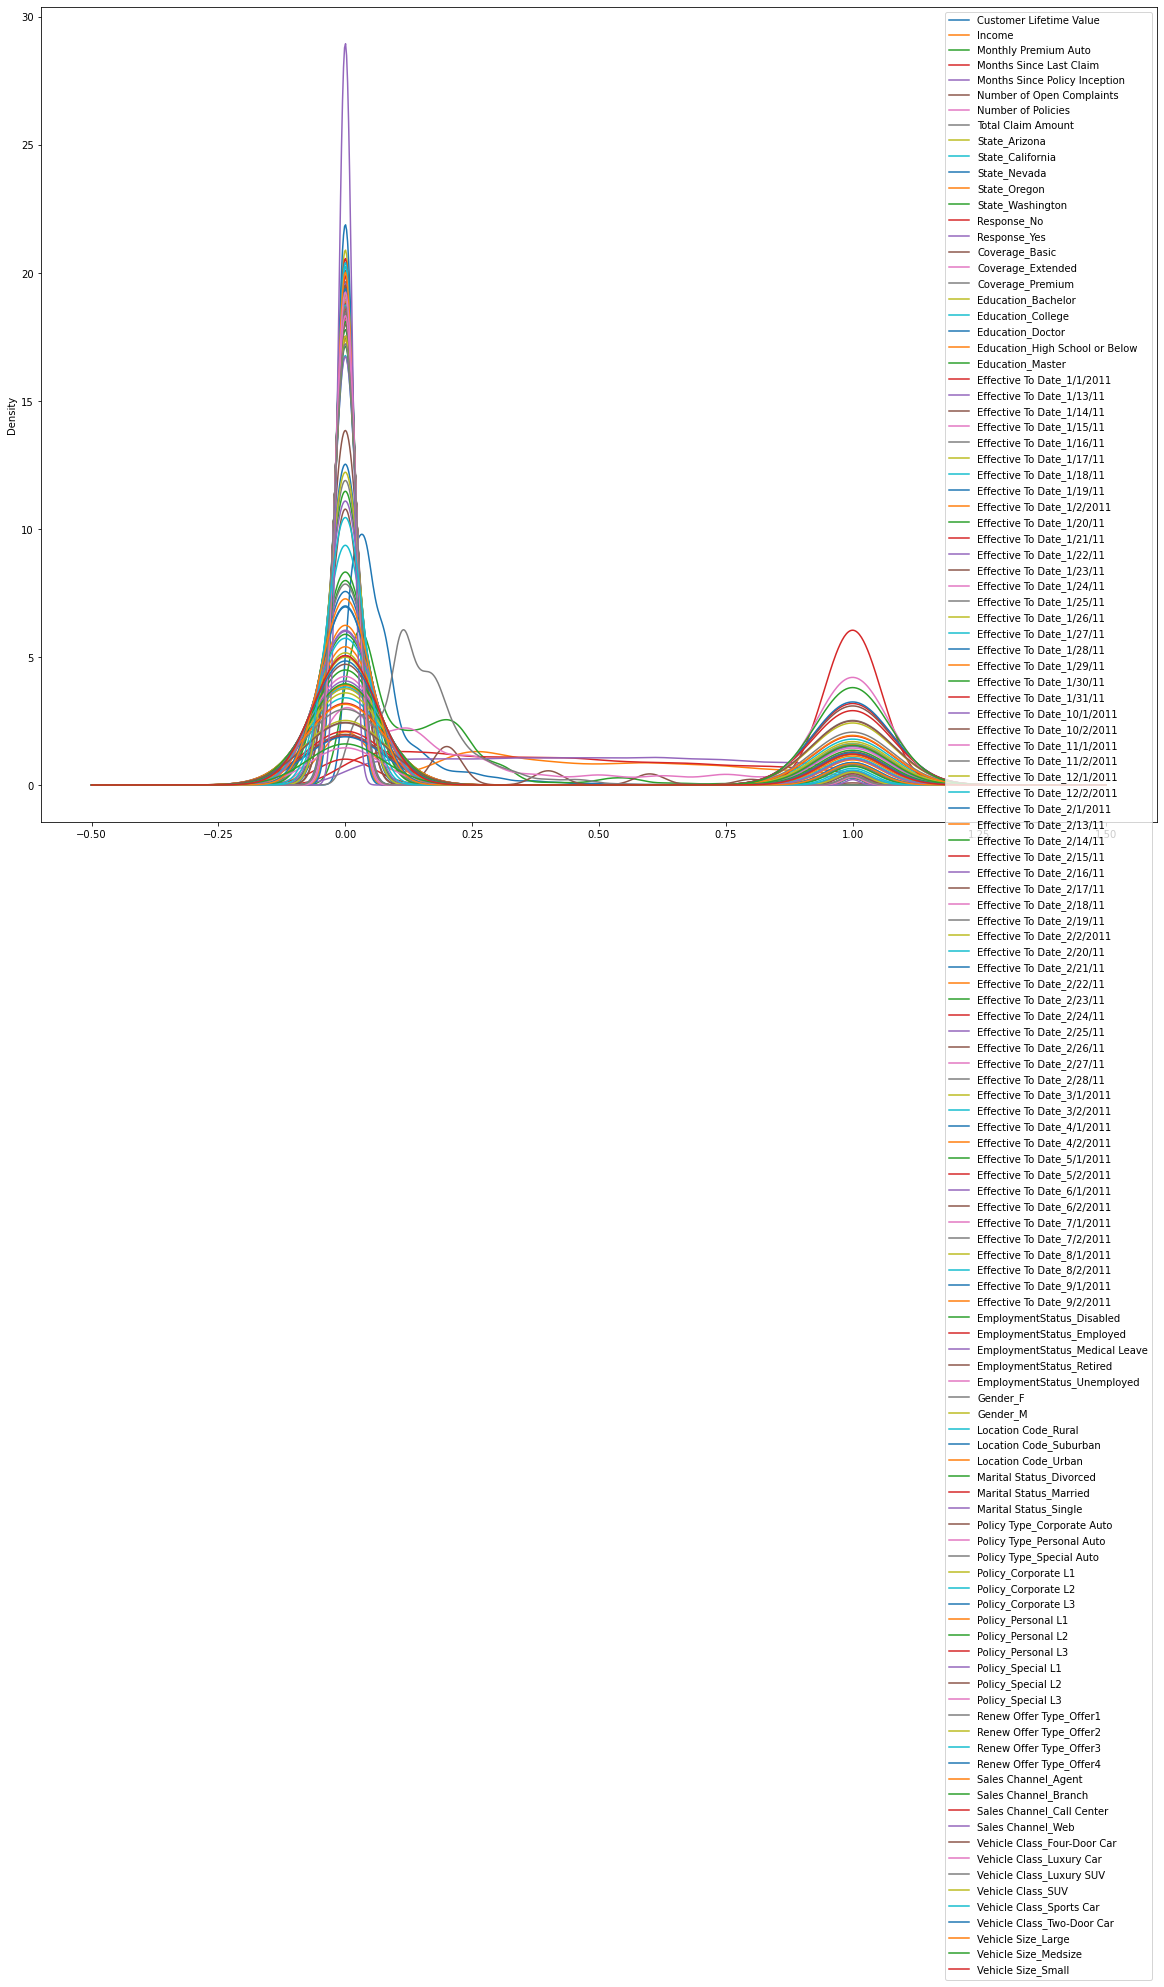

In [38]:
df_norm.plot(kind='kde')

Not a good visual

Lets Create Elbow or Skree plot

Text(0, 0.5, 'Total Within SS')

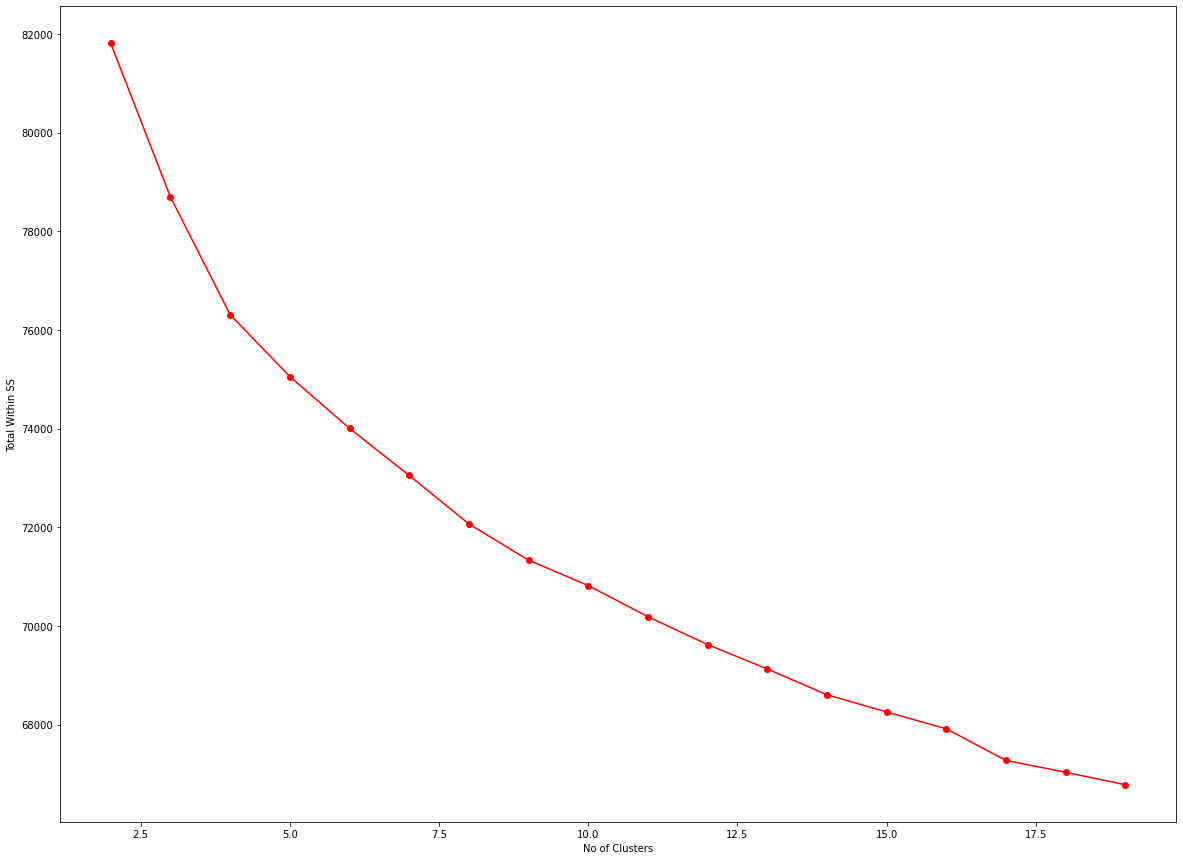

In [40]:
TWSS = []
k=list(range(2,20))

for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
plt.plot(k,TWSS, 'ro-');plt.xlabel("No of Clusters");plt.ylabel('Total Within SS')

In [41]:
from kneed import KneeLocator

In [42]:
kl = KneeLocator(range(2,20), TWSS, curve='convex', direction='decreasing')
kl.elbow

8

Lets make it with 8 clusters

In [44]:
model = KMeans(n_clusters=8)
model.fit(df_norm)
model.labels_
md = pd.Series(model.labels_)
new_df['Clust'] = md
new_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small,Clust
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,1,0,1,0,5
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,1,0,0,0,0,0,0,1,0,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,0,...,0,0,0,0,0,1,0,1,0,2
3,7645.861827,0,106,18,65,0,7,529.881344,0,1,...,0,0,0,1,0,0,0,1,0,5
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,1,0,0,0,0,0,0,1,0,7


In [47]:
cluster = new_df.iloc[:,:-1].groupby(new_df.Clust).mean()
cluster

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
Clust,,,,,,,,,,,,,,,,,,,,,
0,7615.177644,2577.028846,93.454545,14.861014,49.158217,0.448427,3.006119,594.515283,0.189685,0.343531,...,0.151224,0.544580,0.015734,0.015734,0.204545,0.064685,0.154720,0.112762,0.659965,0.227273
1,7670.882267,39684.438961,89.433766,14.690909,46.436364,0.367965,2.896104,496.586436,0.200000,0.335931,...,0.143723,0.498701,0.017316,0.020779,0.211255,0.058874,0.193074,0.100433,0.637229,0.262338
2,8545.804842,45471.397581,97.610484,14.345161,45.740323,0.383065,2.825000,520.288058,0.193548,0.331452,...,0.147581,0.471774,0.024194,0.029032,0.201613,0.051613,0.221774,0.110484,0.608871,0.280645
3,7653.628752,1798.568797,95.608884,15.549296,49.418202,0.315276,3.026002,675.557284,0.184182,0.357530,...,0.127844,0.479957,0.026002,0.029252,0.202600,0.047671,0.214518,0.088841,0.724810,0.186349
4,9098.569753,43321.978597,104.162901,15.546968,49.741974,0.478002,3.101070,450.834321,0.184304,0.346017,...,0.139120,0.491082,0.020214,0.029727,0.186683,0.045184,0.227111,0.101070,0.725327,0.173603
5,7831.021293,46868.653553,92.371193,15.480964,47.649746,0.359137,2.992386,370.219320,0.166244,0.371827,...,0.149746,0.505711,0.019036,0.014594,0.193528,0.052665,0.214467,0.102792,0.713198,0.184010
6,7903.054882,56152.173309,88.129750,15.086191,49.150139,0.357739,2.967563,324.451661,0.189064,0.330862,...,0.145505,0.515292,0.010195,0.013902,0.208526,0.042632,0.209453,0.092678,0.797034,0.110287
7,7962.086545,56332.714286,88.182823,15.336735,48.348639,0.385204,2.965136,110.448139,0.190476,0.335034,...,0.148810,0.534014,0.011054,0.013605,0.164966,0.056973,0.219388,0.114796,0.778061,0.107143


In [48]:
cluster.to_csv('KMEANS_AUTOINSURANCE_8CLUSTERS.csv', encoding='utf-8')

Lets see with 4 clusters

In [49]:
model = KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_
md = pd.Series(model.labels_)
new_df['Clust'] = md
new_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small,Clust
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,1,0,1,0,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,1,0,0,0,0,0,0,1,0,1
2,12887.431650,48767,108,18,38,0,2,566.472247,0,0,...,0,0,0,0,0,1,0,1,0,2
3,7645.861827,0,106,18,65,0,7,529.881344,0,1,...,0,0,0,1,0,0,0,1,0,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,1,0,0,0,0,0,0,1,0,3


In [50]:
cluster = new_df.iloc[:,:-1].groupby(new_df.Clust).mean()
cluster

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
Clust,,,,,,,,,,,,,,,,,,,,,
0,7827.813887,44471.404306,92.434809,15.369019,48.045455,0.367823,2.997608,377.971872,0.165670,0.375598,...,0.144139,0.505383,0.017943,0.014354,0.203349,0.050837,0.208134,0.102871,0.711124,0.186005
1,7739.973495,1444.583178,94.662150,15.186916,48.585514,0.385981,3.025234,631.595144,0.184112,0.344860,...,0.148131,0.498598,0.021028,0.022430,0.206542,0.057477,0.193925,0.109813,0.679439,0.210748
2,8310.428877,49941.325875,93.532299,14.810538,47.527607,0.365933,2.897149,359.408506,0.195236,0.330927,...,0.156983,0.508120,0.016961,0.019848,0.198123,0.047275,0.209672,0.102851,0.705521,0.191628
3,8011.477766,50226.381419,92.183065,15.154449,48.223442,0.413955,2.970992,386.304782,0.192474,0.339867,...,0.130145,0.509996,0.016072,0.022344,0.182281,0.056840,0.212466,0.099569,0.715798,0.184633


In [51]:
cluster.to_csv("KMEANS_AUTOINSURANCE_4CLUSTERS.csv", encoding='utf-8')